## Import libraries


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**Read dataset and get information from data**

In [19]:
df=pd.read_csv('2023_nba_player_stats.csv')

In [20]:
df.head()

PName POS Team  Age  GP   W   L     Min   PTS  FGM  ...  \
0             Jayson Tatum  SF  BOS   25  74  52  22  2732.2  2225  727  ...   
1              Joel Embiid   C  PHI   29  66  43  23  2284.1  2183  728  ...   
2              Luka Doncic  PG  DAL   24  66  33  33  2390.5  2138  719  ...   
3  Shai Gilgeous-Alexander  PG  OKC   24  68  33  35  2416.0  2135  704  ...   
4    Giannis Antetokounmpo  PF  MIL   28  63  47  16  2023.6  1959  707  ...   

   REB  AST  TOV  STL  BLK   PF    FP  DD2  TD3  +/-  
0  649  342  213   78   51  160  3691   31    1  470  
1  670  274  226   66  112  205  3706   39    1  424  
2  569  529  236   90   33  166  3747   36   10  128  
3  329  371  192  112   65  192  3425    3    0  149  
4  742  359  246   52   51  197  3451   46    6  341  

[5 rows x 30 columns]

In [21]:
df

PName  POS Team  Age  GP   W   L     Min   PTS  FGM  \
0               Jayson Tatum   SF  BOS   25  74  52  22  2732.2  2225  727   
1                Joel Embiid    C  PHI   29  66  43  23  2284.1  2183  728   
2                Luka Doncic   PG  DAL   24  66  33  33  2390.5  2138  719   
3    Shai Gilgeous-Alexander   PG  OKC   24  68  33  35  2416.0  2135  704   
4      Giannis Antetokounmpo   PF  MIL   28  63  47  16  2023.6  1959  707   
..                       ...  ...  ...  ...  ..  ..  ..     ...   ...  ...   
534         Alondes Williams  NaN  BKN   23   1   1   0     5.3     0    0   
535            Deonte Burton  NaN  SAC   29   2   1   1     6.5     0    0   
536            Frank Jackson  NaN  UTA   24   1   0   1     5.0     0    0   
537       Michael Foster Jr.  NaN  PHI   20   1   1   0     1.0     0    0   
538           Sterling Brown  NaN  LAL   28   4   2   2    24.4     0    0   

     ...  REB  AST  TOV  STL  BLK   PF    FP  DD2  TD3  +/-  
0    ...  649  342  213   78   51  160  3691   31    1  470  
1    ...  670  274  226   66  112  205  3706   39    1  424  
2    ...  569  529  236   90   33  166  3747   36   10  128  
3    ...  329  371  192  112   65  192  3425    3    0  149  
4    ...  742  359  246   52   51  197  3451   46    6  341  
..   ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  
534  ...    1    0    2    0    0    1    -1    0    0   -5  
535  ...    0    0    0    0    0    0     0    0    0    5  
536  ...    2    1    0    0    0    0     4    0    0   -2  
537  ...    0    0    0    0    0    0     0    0    0   -2  
538  ...    8    2    0    3    0    4    22    0    0   -4  

[539 rows x 30 columns]

In [22]:
df.shape

(539, 30)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [24]:
df.describe()

Age          GP           W           L          Min  \
count  539.000000  539.000000  539.000000  539.000000   539.000000   
mean    25.970315   48.040816   24.018553   24.022263  1103.617625   
std      4.315513   24.650686   14.496366   13.445866   827.765114   
min     19.000000    1.000000    0.000000    0.000000     1.000000   
25%     23.000000   30.500000   12.000000   14.000000   329.000000   
50%     25.000000   54.000000   25.000000   25.000000   970.200000   
75%     29.000000   68.000000   36.000000   34.000000  1845.900000   
max     42.000000   83.000000   57.000000   60.000000  2963.200000   

               PTS         FGM          FGA         FG%         3PM  ...  \
count   539.000000  539.000000   539.000000  539.000000  539.000000  ...   
mean    523.426716  191.576994   403.005566   46.325232   56.324675  ...   
std     498.084360  178.351286   369.595909   10.967271   60.916821  ...   
min       0.000000    0.000000     0.000000    0.000000    0.000000  ...   
25%     120.500000   45.500000    93.500000   41.650000    5.000000  ...   
50%     374.000000  138.000000   300.000000   45.500000   36.000000  ...   
75%     769.500000  283.500000   598.500000   50.600000   92.000000  ...   
max    2225.000000  728.000000  1559.000000  100.000000  301.000000  ...   

              REB         AST         TOV         STL         BLK          PF  \
count  539.000000  539.000000  539.000000  539.000000  539.000000  539.000000   
mean   198.254174  115.545455   61.300557   33.270872   21.241187   91.181818   
std    181.819962  129.578453   58.279185   28.336745   26.529238   66.206731   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     50.500000   22.000000   14.500000    8.500000    5.000000   32.000000   
50%    159.000000   69.000000   44.000000   28.000000   13.000000   86.000000   
75%    286.000000  162.500000   92.500000   51.000000   28.000000  140.000000   
max    973.000000  741.000000  300.000000  128.000000  193.000000  279.000000   

                FP         DD2         TD3         +/-  
count   539.000000  539.000000  539.000000  539.000000  
mean   1036.938776    4.011132    0.220779    0.000000  
std     894.081896    8.770932    1.564432  148.223909  
min      -1.000000    0.000000    0.000000 -642.000000  
25%     254.000000    0.000000    0.000000  -70.000000  
50%     810.000000    0.000000    0.000000   -7.000000  
75%    1646.000000    3.000000    0.000000   57.000000  
max    3842.000000   65.000000   29.000000  640.000000  

[8 rows x 27 columns]

In [25]:
df.isnull().sum()

PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64

In [26]:
df.duplicated().sum()

0

 The columns of the DataFrame have original names, which may not be user-friendly or self-explanatory. The goal of this code is to rename the columns to more meaningful and understandable names.

In [28]:
df.rename(columns={
    'PName': 'Player_Name',
    'POS': 'Position',
    'Team': 'Team_Abbreviation',
    'Age': 'Age',
    'GP': 'Games_Played',
    'W': 'Wins',
    'L': 'Losses',
    'Min': 'Minutes_Played',
    'PTS': 'Total_Points',
    'FGM': 'Field_Goals_Made',
    'FGA': 'Field_Goals_Attempted',
    'FG%': 'Field_Goal_Percentage',
    '3PM': 'Three_Point_FG_Made',
    '3PA': 'Three_Point_FG_Attempted',
    '3P%': 'Three_Point_FG_Percentage',
    'FTM': 'Free_Throws_Made',
    'FTA': 'Free_Throws_Attempted',
    'FT%': 'Free_Throw_Percentage',
    'OREB': 'Offensive_Rebounds',
    'DREB': 'Defensive_Rebounds',
    'REB': 'Total_Rebounds',
    'AST': 'Assists',
    'TOV': 'Turnovers',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'PF': 'Personal_Fouls',
    'FP': 'NBA_Fantasy_Points',
    'DD2': 'Double_Doubles',
    'TD3': 'Triple_Doubles',
    '+/-': 'Plus_Minus'
}, inplace=True)

In [29]:
df.head()

Player_Name Position Team_Abbreviation  Age  Games_Played  \
0             Jayson Tatum       SF               BOS   25            74   
1              Joel Embiid        C               PHI   29            66   
2              Luka Doncic       PG               DAL   24            66   
3  Shai Gilgeous-Alexander       PG               OKC   24            68   
4    Giannis Antetokounmpo       PF               MIL   28            63   

   Wins  Losses  Minutes_Played  Total_Points  Field_Goals_Made  ...  \
0    52      22          2732.2          2225               727  ...   
1    43      23          2284.1          2183               728  ...   
2    33      33          2390.5          2138               719  ...   
3    33      35          2416.0          2135               704  ...   
4    47      16          2023.6          1959               707  ...   

   Total_Rebounds  Assists  Turnovers  Steals  Blocks  Personal_Fouls  \
0             649      342        213      78      51             160   
1             670      274        226      66     112             205   
2             569      529        236      90      33             166   
3             329      371        192     112      65             192   
4             742      359        246      52      51             197   

   NBA_Fantasy_Points  Double_Doubles  Triple_Doubles  Plus_Minus  
0                3691              31               1         470  
1                3706              39               1         424  
2                3747              36              10         128  
3                3425               3               0         149  
4                3451              46               6         341  

[5 rows x 30 columns]

In [30]:
df.describe(include= np.number)

Age  Games_Played        Wins      Losses  Minutes_Played  \
count  539.000000    539.000000  539.000000  539.000000      539.000000   
mean    25.970315     48.040816   24.018553   24.022263     1103.617625   
std      4.315513     24.650686   14.496366   13.445866      827.765114   
min     19.000000      1.000000    0.000000    0.000000        1.000000   
25%     23.000000     30.500000   12.000000   14.000000      329.000000   
50%     25.000000     54.000000   25.000000   25.000000      970.200000   
75%     29.000000     68.000000   36.000000   34.000000     1845.900000   
max     42.000000     83.000000   57.000000   60.000000     2963.200000   

       Total_Points  Field_Goals_Made  Field_Goals_Attempted  \
count    539.000000        539.000000             539.000000   
mean     523.426716        191.576994             403.005566   
std      498.084360        178.351286             369.595909   
min        0.000000          0.000000               0.000000   
25%      120.500000         45.500000              93.500000   
50%      374.000000        138.000000             300.000000   
75%      769.500000        283.500000             598.500000   
max     2225.000000        728.000000            1559.000000   

       Field_Goal_Percentage  Three_Point_FG_Made  ...  Total_Rebounds  \
count             539.000000           539.000000  ...      539.000000   
mean               46.325232            56.324675  ...      198.254174   
std                10.967271            60.916821  ...      181.819962   
min                 0.000000             0.000000  ...        0.000000   
25%                41.650000             5.000000  ...       50.500000   
50%                45.500000            36.000000  ...      159.000000   
75%                50.600000            92.000000  ...      286.000000   
max               100.000000           301.000000  ...      973.000000   

          Assists   Turnovers      Steals      Blocks  Personal_Fouls  \
count  539.000000  539.000000  539.000000  539.000000      539.000000   
mean   115.545455   61.300557   33.270872   21.241187       91.181818   
std    129.578453   58.279185   28.336745   26.529238       66.206731   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%     22.000000   14.500000    8.500000    5.000000       32.000000   
50%     69.000000   44.000000   28.000000   13.000000       86.000000   
75%    162.500000   92.500000   51.000000   28.000000      140.000000   
max    741.000000  300.000000  128.000000  193.000000      279.000000   

       NBA_Fantasy_Points  Double_Doubles  Triple_Doubles  Plus_Minus  
count          539.000000      539.000000      539.000000  539.000000  
mean          1036.938776        4.011132        0.220779    0.000000  
std            894.081896        8.770932        1.564432  148.223909  
min             -1.000000        0.000000        0.000000 -642.000000  
25%            254.000000        0.000000        0.000000  -70.000000  
50%            810.000000        0.000000        0.000000   -7.000000  
75%           1646.000000        3.000000        0.000000   57.000000  
max           3842.000000       65.000000       29.000000  640.000000  

[8 rows x 27 columns]

In [31]:
df.describe(include= 'object')

Player_Name Position Team_Abbreviation
count            539      534               539
unique           539        7                30
top     Jayson Tatum       SG               DAL
freq               1       96                21

In [32]:
df['Position'].fillna('SG', inplace=True)

## Data Visualization

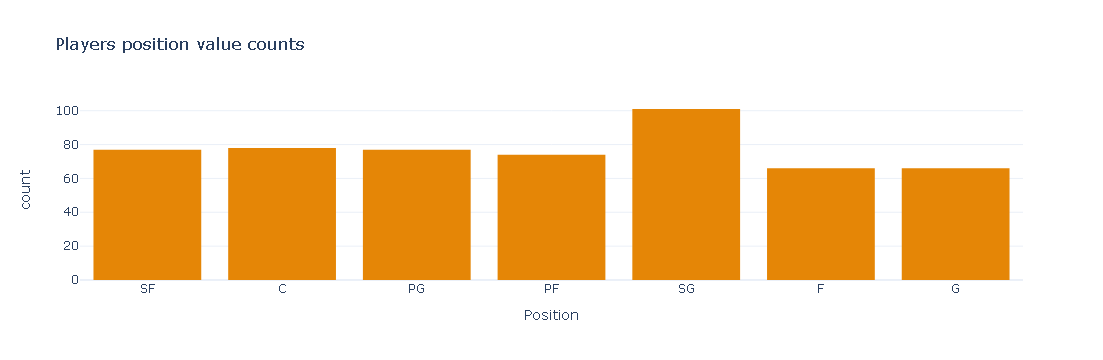

In [34]:
px.histogram(df, x='Position', color_discrete_sequence=px.colors.qualitative.Vivid,
            title='Players position value counts',template='plotly_white')

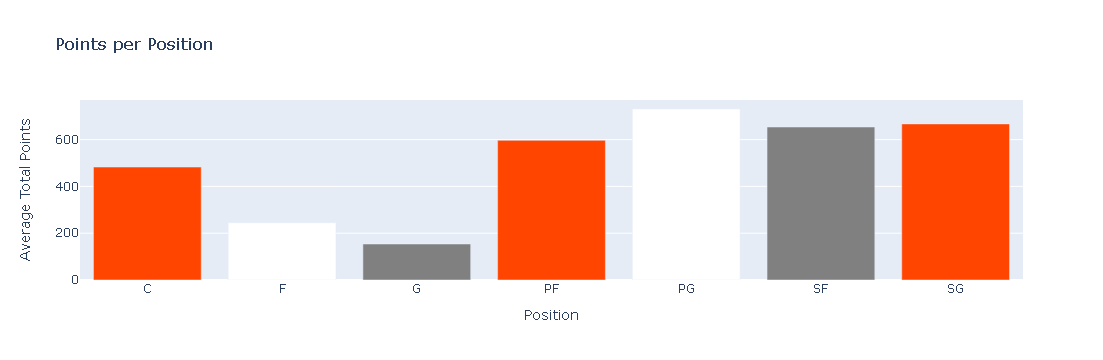

In [35]:
position_stats = df.groupby(['Position']).agg({'Total_Points': 'mean'}).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=position_stats['Position'],
    y=position_stats['Total_Points'],
    marker=dict(color=['orangered', 'white', 'grey','orangered', 'white', 'grey','orangered']),
))

fig.update_layout(
    title='Points per Position',
    xaxis_title='Position',
    yaxis_title='Average Total Points',
    
)

fig.show()

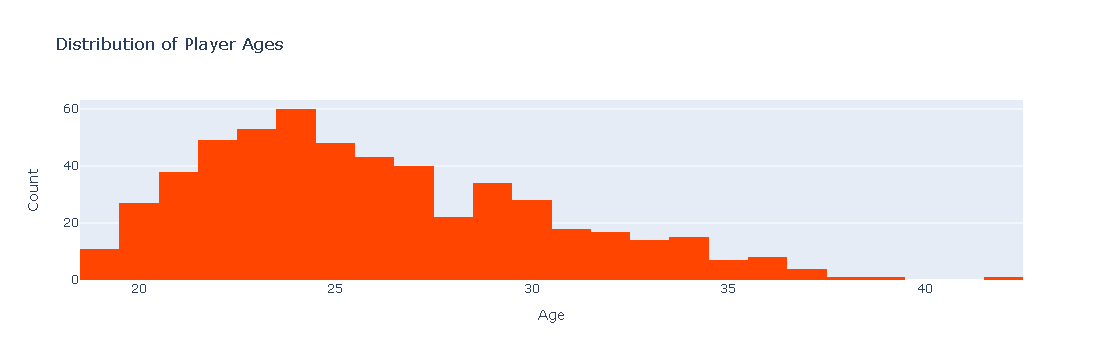

In [36]:
fig_age_histogram = go.Figure()

fig_age_histogram.add_trace(go.Histogram(x=df['Age'], marker_color='orangered'))

fig_age_histogram.update_layout(title='Distribution of Player Ages',
                                xaxis_title='Age',
                                yaxis_title='Count')

fig_age_histogram.show()

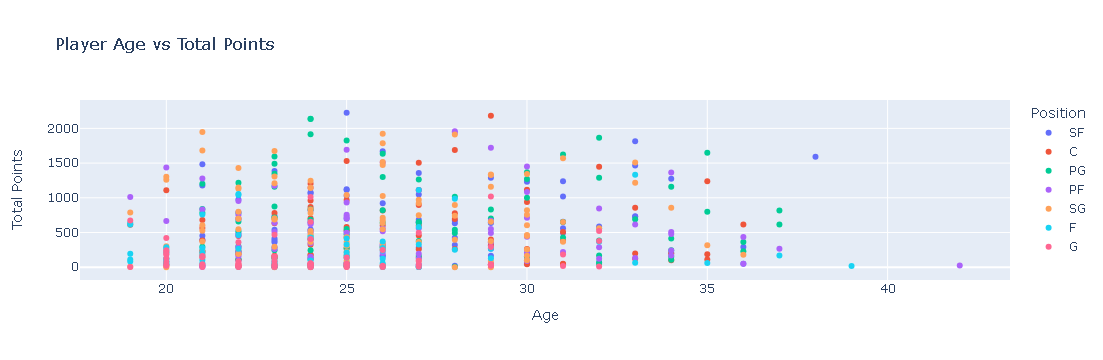

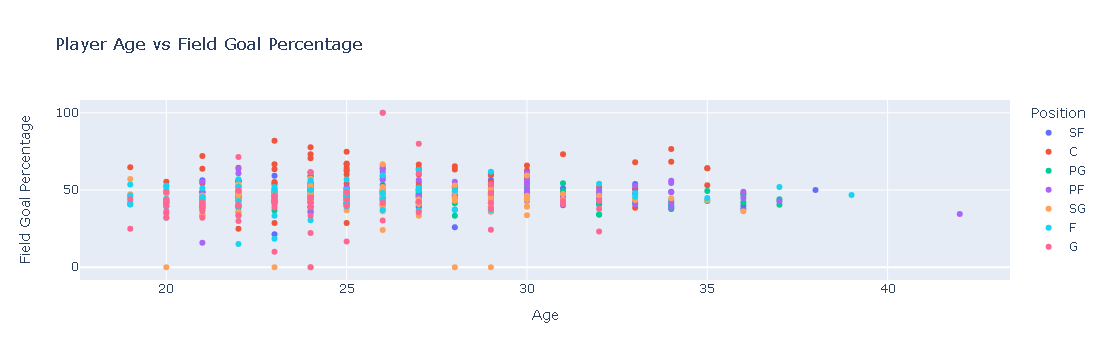

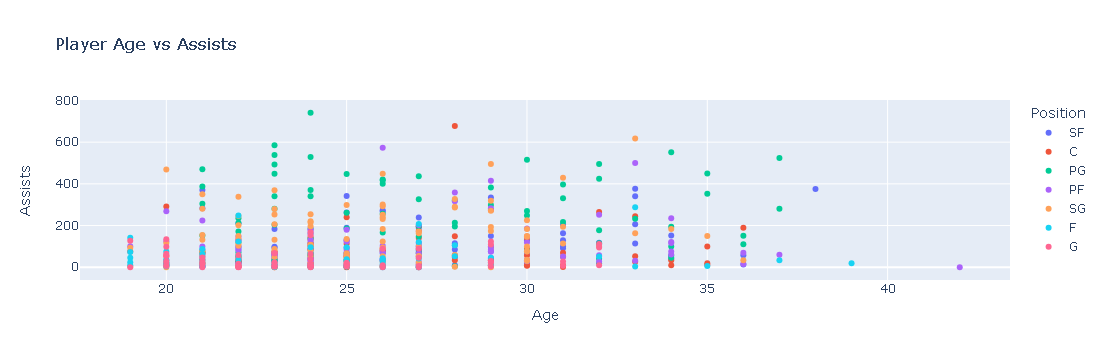

In [37]:
fig_total_points = px.scatter(df, x='Age', y='Total_Points', color='Position', 
                              title='Player Age vs Total Points', 
                              labels={'Age': 'Age', 'Total_Points': 'Total Points'})
                              
fig_total_points.show()

fig_fg_percentage = px.scatter(df, x='Age', y='Field_Goal_Percentage', color='Position', 
                               title='Player Age vs Field Goal Percentage', 
                               labels={'Age': 'Age', 'Field_Goal_Percentage': 'Field Goal Percentage'})
fig_fg_percentage.show()

fig_assists = px.scatter(df, x='Age', y='Assists', color='Position', 
                         title='Player Age vs Assists', 
                         labels={'Age': 'Age', 'Assists': 'Assists'})
fig_assists.show()

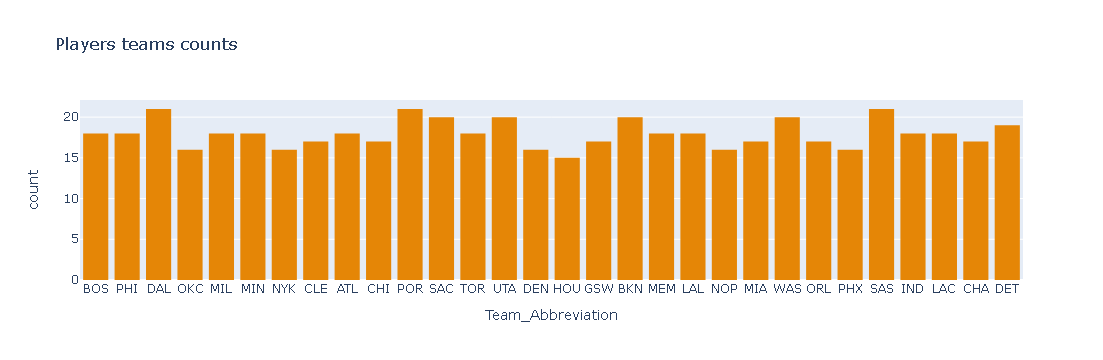

In [38]:
px.histogram(df, x='Team_Abbreviation', color_discrete_sequence=px.colors.qualitative.Vivid, 
             title='Players teams counts')

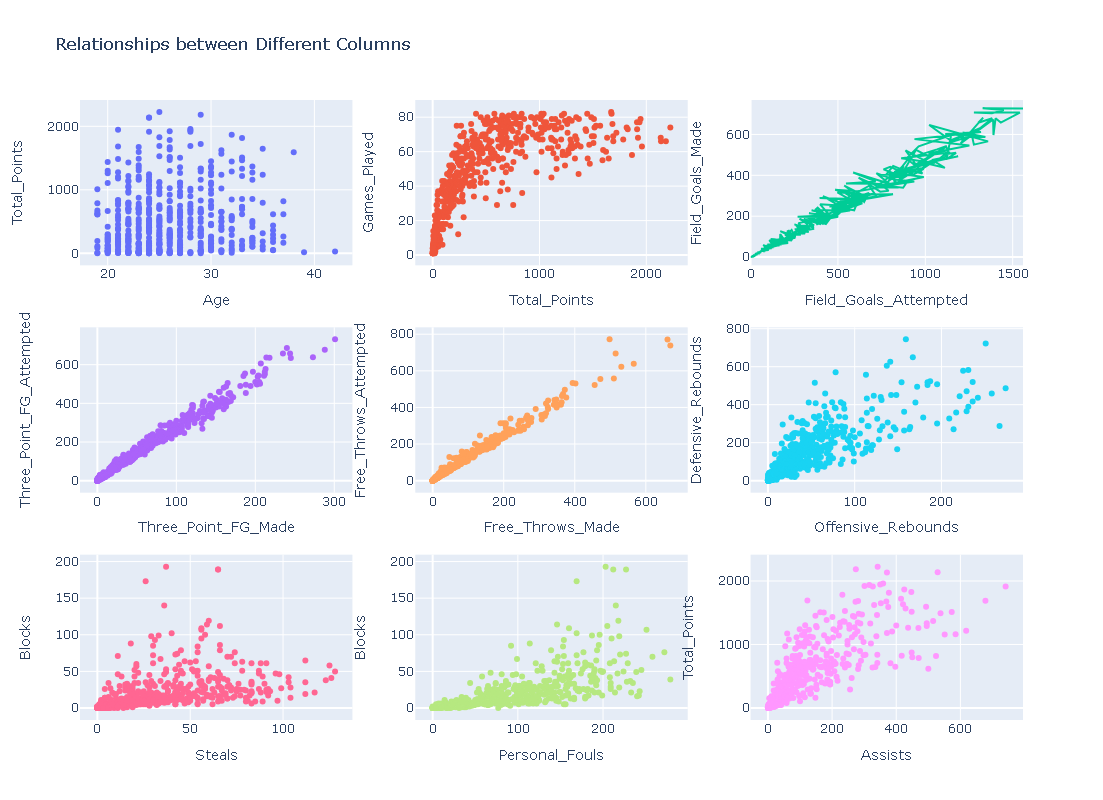

In [39]:
relationships = [
    ('Age', 'Total_Points'),
    ('Total_Points', 'Games_Played'),
    ('Field_Goals_Attempted', 'Field_Goals_Made'),
    ('Three_Point_FG_Made', 'Three_Point_FG_Attempted'),
    ('Free_Throws_Made', 'Free_Throws_Attempted'),
    ('Offensive_Rebounds', 'Defensive_Rebounds'),
    ('Steals', 'Blocks'),
    ('Personal_Fouls', 'Blocks'),
    ('Assists', 'Total_Points')
]

fig = make_subplots(rows=3, cols=3)

for idx, (x_col, y_col) in enumerate(relationships, start=1):
    row = (idx - 1) // 3 + 1
    col = (idx - 1) % 3 + 1
    fig.add_trace(go.Scatter(x=df[x_col], y=df[y_col], mode='markers' if idx != 3 else 'lines'), row=row, col=col)

    fig.update_xaxes(title_text=x_col, row=row, col=col)
    fig.update_yaxes(title_text=y_col, row=row, col=col)

fig.update_layout(
    title_text='Relationships between Different Columns',
    height=800,
    width=1000
)

fig.update_layout(showlegend=False)
fig.update_annotations(dict(text='', showarrow=False))

fig.show()

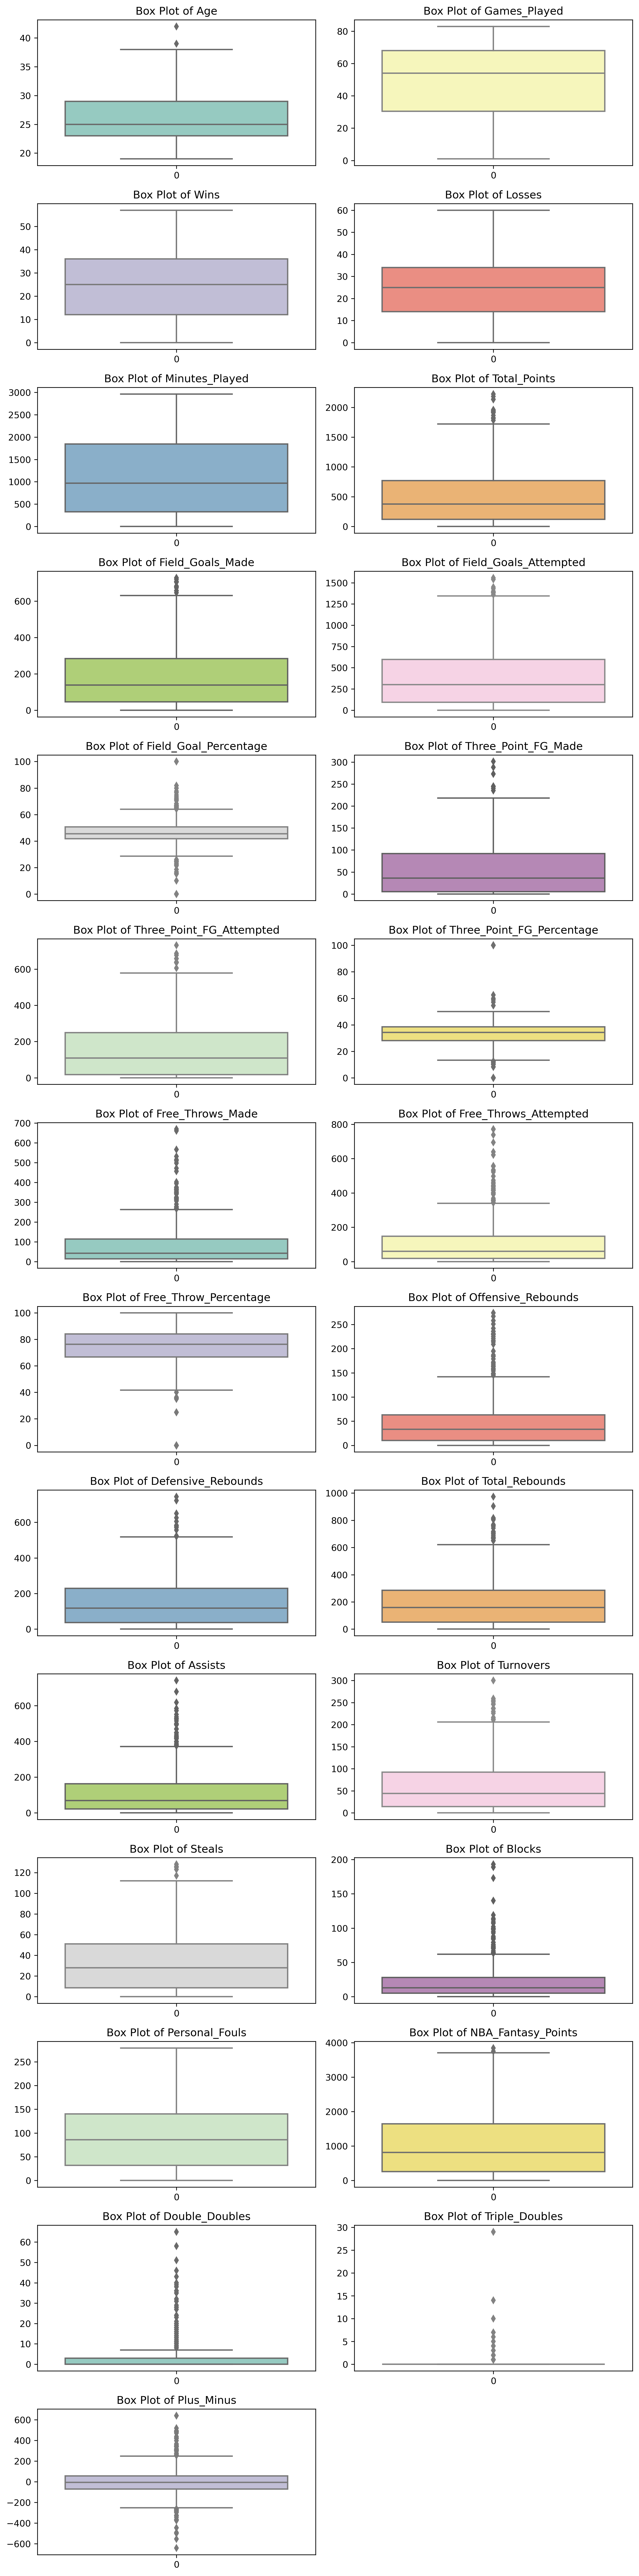

In [40]:
column_to_exclude = ['Player_Name', 'Position', 'Team_Abbreviation']

all_columns = df.columns

columns = all_columns.drop(column_to_exclude).values

num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(10, 40),dpi = 300)

colors = sns.color_palette("Set3", num_columns)
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df[column], ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(f'Box Plot of {column}')

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

## Features Engineering

In [42]:
df.drop(columns=['Player_Name', 'Position', 'Team_Abbreviation', 'Field_Goals_Made', 'Field_Goals_Attempted', 'Three_Point_FG_Made',
                 'Three_Point_FG_Attempted', 'Three_Point_FG_Percentage', 'NBA_Fantasy_Points', 'Double_Doubles','Free_Throws_Attempted',
                 'Triple_Doubles', 'Offensive_Rebounds', 'Defensive_Rebounds'],
        inplace=True)

 Some columns were Dropped to potentially improve the performance of subsequent analyses or models that are sensitive to multicollinearity or high correlation among features.

In [44]:
df1=df

In [45]:
df1.head()

Age  Games_Played  Wins  Losses  Minutes_Played  Total_Points  \
0   25            74    52      22          2732.2          2225   
1   29            66    43      23          2284.1          2183   
2   24            66    33      33          2390.5          2138   
3   24            68    33      35          2416.0          2135   
4   28            63    47      16          2023.6          1959   

   Field_Goal_Percentage  Free_Throws_Made  Free_Throw_Percentage  \
0                   46.6               531                   85.4   
1                   54.8               661                   85.7   
2                   49.6               515                   74.2   
3                   51.0               669                   90.5   
4                   55.3               498                   64.5   

   Total_Rebounds  Assists  Turnovers  Steals  Blocks  Personal_Fouls  \
0             649      342        213      78      51             160   
1             670      274        226      66     112             205   
2             569      529        236      90      33             166   
3             329      371        192     112      65             192   
4             742      359        246      52      51             197   

   Plus_Minus  
0         470  
1         424  
2         128  
3         149  
4         341

In [46]:
df1.shape

(539, 16)

**Splitting Dataset**

Splitting Dataset

In [49]:
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score

In [50]:
X = df1.drop('Total_Points',axis = 1)
y = df1['Total_Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [51]:
X_train.shape

(431, 15)

In [52]:
y_train.shape

(431,)

## 1. Modeling


**1.1. Linear Regression**

In [55]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


R² Score: 0.97
Mean Absolute Error (MAE): 63.34


**The R² Score of 0.97**, It indicates that 97% of the variability in the target variable is explained by the Linear Regression model, showcasing excellent performance. 

**The Mean Absolute Error (MAE) of 63.34**, It means the model's predictions deviate by an average of 63.34 units from the actual values, reflecting high accuracy.

 **1.2. K_Neighbors Regressor**

In [103]:
from sklearn.neighbors import KNeighborsRegressor
# Prepare data
X = df1.drop('Total_Points', axis=1)
y = df1['Total_Points']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Train the model
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R² Score: 0.88
Mean Absolute Error (MAE): 100.72


**The R² Score of 0.89**, It indicates that 89% of the variability in the target variable is explained by the KNeighbors Regressor model, which shows strong predictive power. 

**The MAE of 100.72**,It suggests that, on average, the model's predictions deviate by about 100.72 units from the actual values

**1.3. Decision Tree Regressor**

In [59]:
from sklearn.tree import DecisionTreeRegressor
# Prepare data
X = df1.drop('Total_Points', axis=1)
y = df1['Total_Points']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R² Score: 0.89
Mean Absolute Error (MAE): 86.94


**The R² Score of 0.89** indicates that the DecisionTreeRegressor explains 89% of the variability in the target variable, showing a strong fit.

 **The Mean Absolute Error (MAE) of 86.94** suggests that, on average, predictions are off by approximately 87 units

**1.4. Random Forest Regressor**

In [61]:
from sklearn.ensemble import RandomForestRegressor
# Prepare data
X = df1.drop('Total_Points', axis=1)
y = df1['Total_Points']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R² Score: 0.96
Mean Absolute Error (MAE): 73.07


**Random Forest Regressor** , It achieved an excellent R² score of 0.96, indicating that it explains 96% of the variability in the target variable.

**Mean Absolute Error (MAE) of 73.07**, It suggests that, on average, the model's predictions deviate by 73.07 from the actual values.

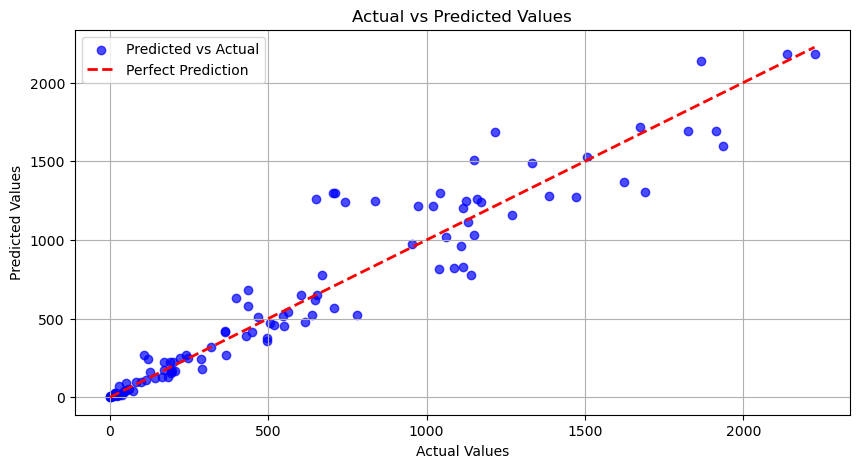

C:\Users\HP\OneDrive\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



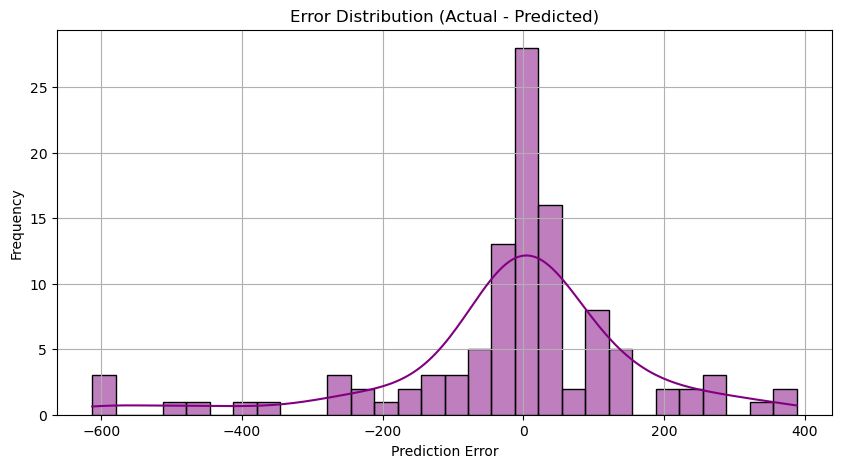

In [98]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Visualization: Error Distribution
errors = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(errors, kde=True, bins=30, color='purple')
plt.title("Error Distribution (Actual - Predicted)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid()
plt.show()
